In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("onlinefraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0,0.0
28295,8,CASH_OUT,138651.85,C297851161,0.0,0.00,C1034382650,142758.39,281410.24,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28297 entries, 0 to 28296
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28297 non-null  int64  
 1   type            28297 non-null  object 
 2   amount          28297 non-null  float64
 3   nameOrig        28297 non-null  object 
 4   oldbalanceOrg   28297 non-null  float64
 5   newbalanceOrig  28297 non-null  float64
 6   nameDest        28297 non-null  object 
 7   oldbalanceDest  28297 non-null  float64
 8   newbalanceDest  28297 non-null  float64
 9   isFraud         28296 non-null  float64
 10  isFlaggedFraud  28296 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
df.type.value_counts()

type
PAYMENT     13913
CASH_OUT     6109
CASH_IN      5027
TRANSFER     2735
DEBIT         513
Name: count, dtype: int64

In [ ]:
df = df.iloc[:-1,:-1]
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
28291,8,CASH_OUT,78635.42,C1046801601,0.0,0.00,C766681183,17277864.84,17356500.26,0.0
28292,8,CASH_OUT,7270.37,C457003860,0.0,0.00,C219416103,1523685.68,1530956.05,0.0
28293,8,CASH_OUT,113043.31,C1845952463,0.0,0.00,C483817115,10085462.79,10014348.15,0.0
28294,8,CASH_OUT,89346.62,C140193335,0.0,0.00,C1326121635,112673.41,202020.02,0.0


In [ ]:
df1=df[df["isFraud"]==1]
len(df1)

84

In [ ]:
df0 = df[df["isFraud"]==0].sample(len(df1))

In [ ]:
df = pd.concat([df1, df0])
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1.0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...
11808,7,CASH_IN,219914.80,C1248650584,62917.00,282831.80,C83827469,10379.00,8456145.84,0.0
24444,8,TRANSFER,675934.49,C687356737,11480.00,0.00,C2061011390,837.89,676772.38,0.0
10514,7,CASH_OUT,71585.64,C331319862,0.00,0.00,C2145041211,171550.98,143252.84,0.0
15020,8,PAYMENT,11652.05,C1589254291,12527.00,874.95,M2112782203,0.00,0.00,0.0


In [ ]:
dummies = pd.get_dummies(df["type"].astype('category'))
dummies = dummies.astype(int)

In [ ]:
merged = pd.concat([df, dummies], axis='columns')
merged.drop(columns="type", inplace=True)
merged

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0,1,0,0,0
251,1,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1.0,0,0,0,0,1
252,1,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1.0,0,1,0,0,0
680,1,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,7,219914.80,C1248650584,62917.00,282831.80,C83827469,10379.00,8456145.84,0.0,1,0,0,0,0
24444,8,675934.49,C687356737,11480.00,0.00,C2061011390,837.89,676772.38,0.0,0,0,0,0,1
10514,7,71585.64,C331319862,0.00,0.00,C2145041211,171550.98,143252.84,0.0,0,1,0,0,0
15020,8,11652.05,C1589254291,12527.00,874.95,M2112782203,0.00,0.00,0.0,0,0,0,1,0


In [ ]:
neworder = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "CASH_IN", "CASH_OUT","PAYMENT", "TRANSFER"]
merged = merged[neworder]
merged

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,PAYMENT,TRANSFER
2,181.00,181.00,0.00,0.00,0.00,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,0,1,0,0
251,2806.00,2806.00,0.00,0.00,0.00,0,0,0,1
252,2806.00,2806.00,0.00,26202.00,0.00,0,1,0,0
680,20128.00,20128.00,0.00,0.00,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...
11808,219914.80,62917.00,282831.80,10379.00,8456145.84,1,0,0,0
24444,675934.49,11480.00,0.00,837.89,676772.38,0,0,0,1
10514,71585.64,0.00,0.00,171550.98,143252.84,0,1,0,0
15020,11652.05,12527.00,874.95,0.00,0.00,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(merged)
scaled = pd.DataFrame(scaled)
scaled

,0,1,2,3,4,5,6,7,8
0,-0.274682,-0.313982,-0.248117,-0.200094,-0.299539,-0.313112,-0.688247,-0.650945,1.581139
1,-0.274682,-0.313982,-0.248117,-0.187853,-0.299539,-0.313112,1.452966,-0.650945,-0.632456
2,-0.272615,-0.312455,-0.248117,-0.200094,-0.299539,-0.313112,-0.688247,-0.650945,1.581139
3,-0.272615,-0.312455,-0.248117,-0.184952,-0.299539,-0.313112,1.452966,-0.650945,-0.632456
4,-0.258981,-0.302384,-0.248117,-0.200094,-0.299539,-0.313112,-0.688247,-0.650945,1.581139
...,...,...,...,...,...,...,...,...,...
163,-0.101731,-0.277507,0.010317,-0.194096,3.265472,3.193744,-0.688247,-0.650945,-0.632456
164,0.257198,-0.307412,-0.248117,-0.199610,-0.014219,-0.313112,-0.688247,-0.650945,1.581139
165,-0.218480,-0.314087,-0.248117,-0.100952,-0.239145,-0.313112,1.452966,-0.650945,-0.632456
166,-0.265653,-0.306804,-0.247318,-0.200094,-0.299539,-0.313112,-0.688247,1.536229,-0.632456


In [ ]:
x = scaled
y = df["isFraud"]
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y,test_size = 0.2)

In [ ]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(scaled, df["isFraud"])

LogisticRegression()

In [ ]:
model.score(x_test, y_test)

0.9411764705882353

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(x_test))

array([[15,  2],
       [ 0, 17]])

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

1.0

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9411764705882353

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9705882352941176

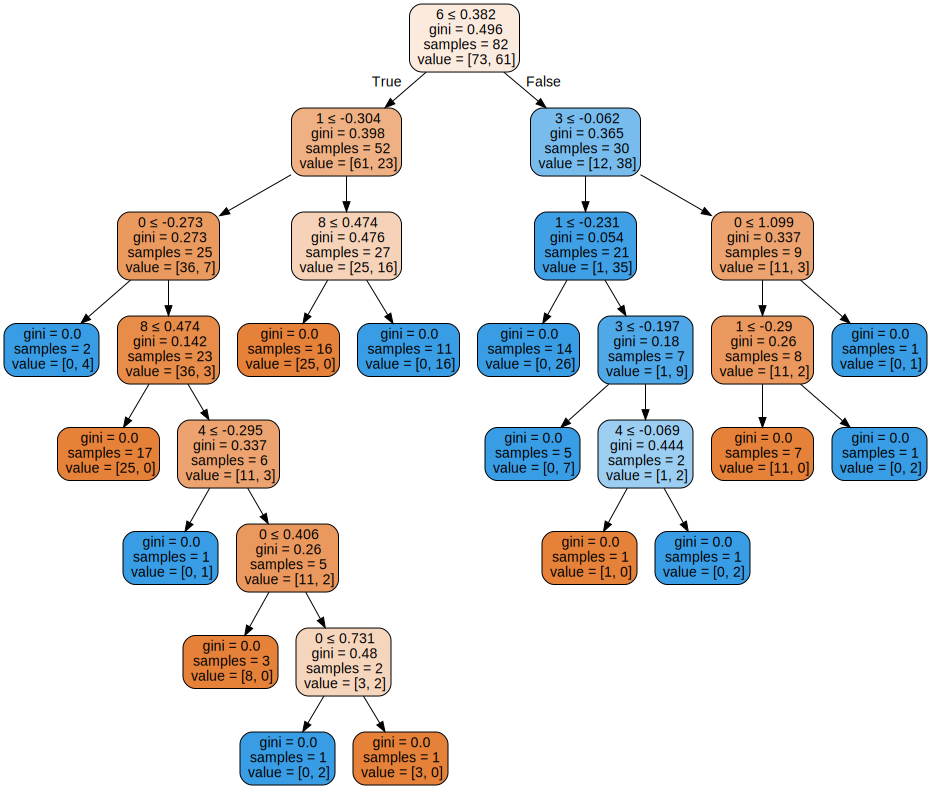

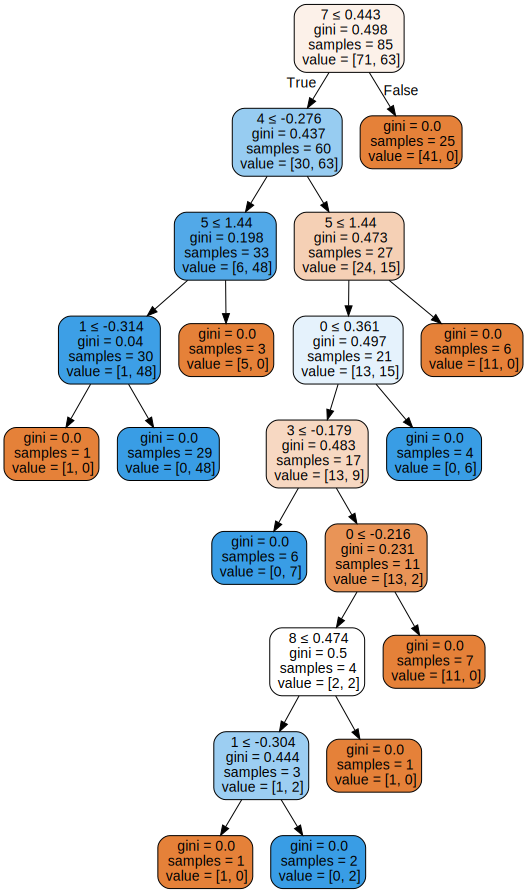

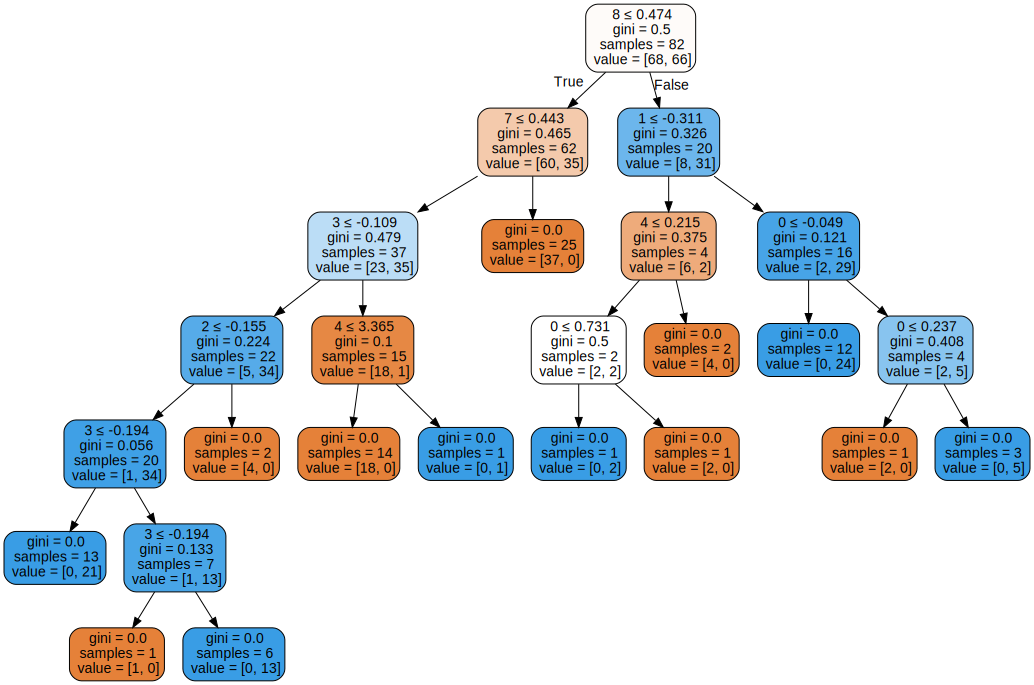

In [ ]:
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz
for i in range(3):
  tree = model.estimators_[i]
  dot_data = export_graphviz(tree, out_file=None, feature_names=x.columns, filled=True, rounded=True, special_characters=True)
  graph = graphviz.Source(dot_data)
  display(graph)

In [ ]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1612364363)

# **XGBOOST**

In [ ]:
import xgboost as xgb
dtrain_reg = xgb.DMatrix(x_train,y_train)
dtest_reg = xgb.DMatrix(x_test,y_test)
dtrain_reg

In [ ]:
watchlist = [(dtrain_reg, 'train'), (dtest_reg, 'test')]
params = {"objective": "reg:squarederror"}
model = xgb.train(params,dtrain = dtrain_reg, evals = watchlist, num_boost_round = 100)

[0]	train-rmse:0.36509	test-rmse:0.39289
[1]	train-rmse:0.26546	test-rmse:0.33089
[2]	train-rmse:0.19818	test-rmse:0.28005
[3]	train-rmse:0.14518	test-rmse:0.26676
[4]	train-rmse:0.11141	test-rmse:0.24102
[5]	train-rmse:0.08926	test-rmse:0.22621
[6]	train-rmse:0.07334	test-rmse:0.21700
[7]	train-rmse:0.06135	test-rmse:0.20929
[8]	train-rmse:0.04970	test-rmse:0.20621
[9]	train-rmse:0.04067	test-rmse:0.20312
[10]	train-rmse:0.03348	test-rmse:0.20370
[11]	train-rmse:0.02787	test-rmse:0.20491
[12]	train-rmse:0.02345	test-rmse:0.20622
[13]	train-rmse:0.01996	test-rmse:0.20756
[14]	train-rmse:0.01711	test-rmse:0.20909
[15]	train-rmse:0.01442	test-rmse:0.20856
[16]	train-rmse:0.01342	test-rmse:0.20862
[17]	train-rmse:0.01196	test-rmse:0.20846
[18]	train-rmse:0.01089	test-rmse:0.20845
[19]	train-rmse:0.00969	test-rmse:0.20845
[20]	train-rmse:0.00838	test-rmse:0.20841
[21]	train-rmse:0.00739	test-rmse:0.20838
[22]	train-rmse:0.00647	test-rmse:0.20851
[23]	train-rmse:0.00583	test-rmse:0.20839
[2

In [ ]:
model.predict(dtest_reg)

array([-4.78036964e-05,  6.28703201e-05,  1.73321486e-01,  1.00052702e+00,
        5.72341204e-01,  9.92459774e-01,  8.96237314e-01, -4.34025703e-03,
        1.00192356e+00,  5.98306894e-01,  9.99296367e-01,  6.34480966e-04,
        3.12292743e-02,  8.86933208e-01, -4.78036964e-05,  1.00000036e+00,
        1.01198900e+00,  9.98877466e-01,  6.09520853e-01,  4.43993544e-04,
        8.03348243e-01,  9.89378750e-01,  3.21798027e-01,  6.93433940e-01,
        1.02868879e+00, -8.51028562e-02, -1.11802176e-04,  5.82381070e-01,
        5.00420965e-02,  1.00065911e+00,  7.95656306e-05,  2.38008070e-04,
        1.00990081e+00,  9.82114255e-01], dtype=float32)

In [ ]:
model.eval(dtest_reg)

'[0]\teval-rmse:0.20858691832873097'

In [ ]:
y_pred_proba = model.predict(dtest_reg)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy_score(y_test, y_pred)

0.9117647058823529

# **LIGHT bgm**

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test)
params = {"boosting_type":"gbdt", "objective":"binary", "metric":"binary_logloss",'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0}
lgbmodel = lgb.train(params, train_data, num_boost_round=100, valid_sets=test_data)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
y_pred_proba = lgbmodel.predict(x_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy_score(y_test, y_pred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[17,  0],
       [ 0, 17]])

# **SUPPORT VECTOR MACHINES**

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [ ]:
y_svpred = sv.predict(x_test)
accuracy_score(y_test, y_svpred)

0.9411764705882353

# **KERAS**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ke = Sequential()
ke.add(Dense(12, input_shape=(9,), activation='relu'))
ke.add(Dense(8, activation='relu'))
ke.add(Dense(1, activation='sigmoid'))

In [ ]:
ke.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ke.fit(x_train, y_train)

5/5 [==============================] - 2s 12ms/step - loss: 0.6503 - accuracy: 0.5373


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
model = RandomForestClassifier()
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(model,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b215204fa60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b21523e7100>})

In [ ]:
rand_search.best_params_

{'max_depth': 5, 'n_estimators': 368}

In [ ]:
y_rand_search = rand_search.predict(x_test)
accuracy_score(y_test, y_rand_search)

1.0

In [ ]:
model.fit(x_train,y_train)
y_rf = model.predict(x_test)
accuracy_score(y_test, y_rf)

1.0

In [ ]:
!pip install fastapi uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastapi import FastAPI
import uvicorn
app = FastAPI()
@app.get("/")
def index():
  return {"message": "welcome to API"}

@app.get("/predict")
def predict(amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, CASH_IN, CASH_OUT, PAYMENT, TRANSFER):
  data = [[amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, CASH_IN, CASH_OUT, PAYMENT, TRANSFER]]
  return {"prediction": model.predict(data)}